In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
df = pd.read_csv('./data/VIC.csv')
print(df.head())
print(df.info())

NameError: name 'pd' is not defined

In [ ]:
# chuyen du lieu thanh datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df = df.drop(columns=['Open Interest'])
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101266 entries, 0 to 101265
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Ticker     101266 non-null  object        
 1   Date/Time  101266 non-null  datetime64[ns]
 2   Open       101266 non-null  float64       
 3   High       101266 non-null  float64       
 4   Low        101266 non-null  float64       
 5   Close      101266 non-null  float64       
 6   Volume     101266 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 5.4+ MB
None
  Ticker           Date/Time  Open  High   Low  Close  Volume
0    VIC 2018-10-17 09:39:00  98.5  98.5  98.5   98.5     390
1    VIC 2018-10-17 09:40:00  98.5  98.5  98.5   98.5     760
2    VIC 2018-10-17 09:41:00  98.6  98.6  98.6   98.6    2060
3    VIC 2018-10-17 09:42:00  98.6  98.6  98.6   98.6    5540
4    VIC 2018-10-17 09:43:00  98.6  98.7  98.6   98.7     760


In [ ]:
# Tính khoảng cách thời gian giữa các dòng liên tiếp (tính bằng giây)
time_diffs = df['Date/Time'].diff().dt.total_seconds()

# Chuyển đổi từ giây sang phút (chia cho 60)
time_diffs_minutes = time_diffs / 60

# Tính trung bình khoảng cách (loại bỏ NaN ở dòng đầu tiên)
average_time_diff = time_diffs_minutes.dropna().mean()

max_time_diff = time_diffs_minutes.dropna().max()

min_time_diff = time_diffs_minutes.dropna().min()

# In kết quả
print(f'Trung bình khoảng cách thời gian giữa các dòng: {average_time_diff:.2f} phút')

print(f'Max khoảng cách thời gian giữa các dòng: {max_time_diff:.2f} phút')

print(f'Min khoảng cách thời gian giữa các dòng: {min_time_diff:.2f} phút')


Trung bình khoảng cách thời gian giữa các dòng: 11.34 phút
Max khoảng cách thời gian giữa các dòng: 14069.00 phút
Min khoảng cách thời gian giữa các dòng: 1.00 phút


In [ ]:
df.set_index('Date/Time', inplace=True)

# Tổng hợp theo ngày
df_daily = df.resample('1D').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})
df_daily.head(20)


,Open,High,Low,Close,Volume
Date/Time,,,,,
2018-10-17,98.5,99.6,98.3,99.0,1266610
2018-10-18,98.5,99.2,98.0,99.1,896140
2018-10-19,96.5,99.1,96.5,99.1,915870
2018-10-20,NaN,NaN,NaN,NaN,0
2018-10-21,NaN,NaN,NaN,NaN,0
2018-10-22,98.1,99.6,97.1,99.1,536930
2018-10-23,98.1,99.0,96.5,99.0,608750
2018-10-24,98.0,99.5,97.5,98.8,681290
2018-10-25,96.7,98.2,94.6,96.8,404050


In [ ]:
df_daily = df_daily.dropna()
df_daily.head(20)

,Open,High,Low,Close,Volume
Date/Time,,,,,
2018-10-17,98.5,99.6,98.3,99.0,1266610
2018-10-18,98.5,99.2,98.0,99.1,896140
2018-10-19,96.5,99.1,96.5,99.1,915870
2018-10-22,98.1,99.6,97.1,99.1,536930
2018-10-23,98.1,99.0,96.5,99.0,608750
2018-10-24,98.0,99.5,97.5,98.8,681290
2018-10-25,96.7,98.2,94.6,96.8,404050
2018-10-26,96.2,98.0,95.7,96.4,653110
2018-10-29,95.5,97.7,95.0,97.2,643700


In [ ]:
date_diffs = df_daily.index.to_series().diff().dt.days.dropna()  # Tính khoảng cách ngày
avg_gap = date_diffs.mean()  # Trung bình khoảng cách
print("Trung bình khoảng cách giữa các ngày có dữ liệu:", avg_gap, "ngày")

Trung bình khoảng cách giữa các ngày có dữ liệu: 1.4570383912248628 ngày


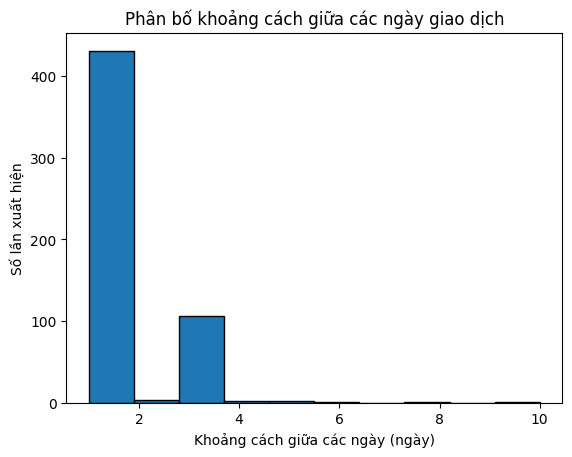

In [ ]:

plt.hist(date_diffs, bins=10, edgecolor='black')
plt.xlabel('Khoảng cách giữa các ngày (ngày)')
plt.ylabel('Số lần xuất hiện')
plt.title('Phân bố khoảng cách giữa các ngày giao dịch')
plt.show()

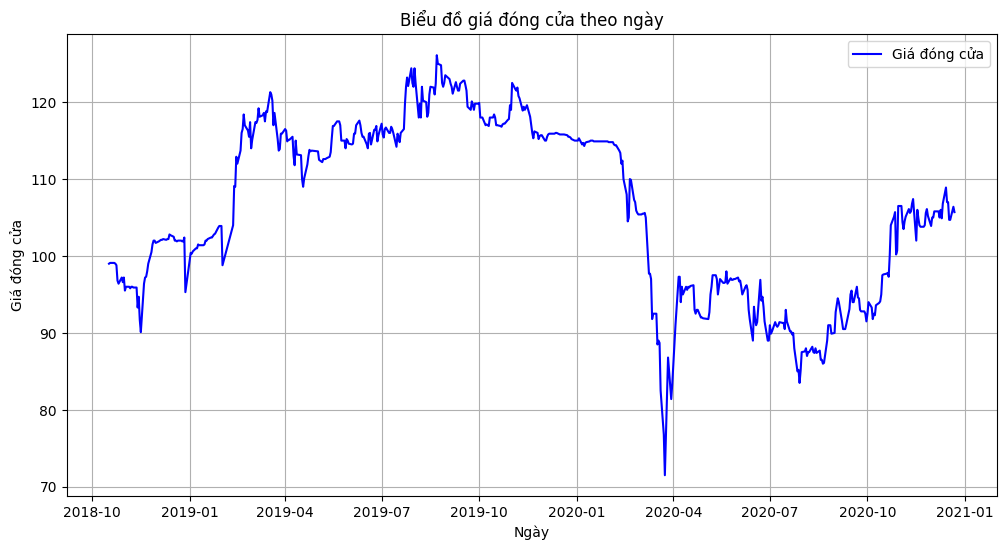

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily['Close'], linestyle='-', color='b', label='Giá đóng cửa')

# Định dạng biểu đồ
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa')
plt.title('Biểu đồ giá đóng cửa theo ngày')
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

In [ ]:
import pandas_ta as ta

df_daily['OBV'] = ta.obv(close=df_daily['Close'], volume=df_daily['Volume']) 

df_daily['RSI_5'] = ta.rsi(close=df_daily['Close'], length=5)  

df_daily['Momentum'] = df_daily['Close'] - df_daily['Close'].shift(5)

df_daily['EMA_7'] = df_daily['Close'].ewm(span=7, adjust=False).mean()

df_daily = df_daily.dropna()  # Xóa các hàng  là NaN
df_daily.head(20)


,Open,High,Low,Close,Volume,OBV,RSI_5,Momentum,EMA_7
Date/Time,,,,,,,,,
2018-10-24,98.0,99.5,97.5,98.8,681290,872710.0,12.761715,-0.2,98.982520
2018-10-25,96.7,98.2,94.6,96.8,404050,468660.0,1.451988,-2.3,98.436890
2018-10-26,96.2,98.0,95.7,96.4,653110,-184450.0,1.188638,-2.7,97.927667
2018-10-29,95.5,97.7,95.0,97.2,643700,459250.0,32.015031,-1.9,97.745750
2018-10-30,95.5,97.3,95.5,96.6,452080,7170.0,24.770350,-2.4,97.459313
2018-10-31,95.6,97.2,95.6,97.2,582470,589640.0,41.357977,-1.6,97.394485
2018-11-01,96.5,96.8,95.0,95.5,1225020,-635380.0,23.222901,-1.3,96.920863
2018-11-02,95.6,96.7,95.5,96.0,1484060,848680.0,33.881797,-0.4,96.690648
2018-11-05,96.0,96.5,95.1,96.0,664130,848680.0,33.881797,-1.2,96.517986


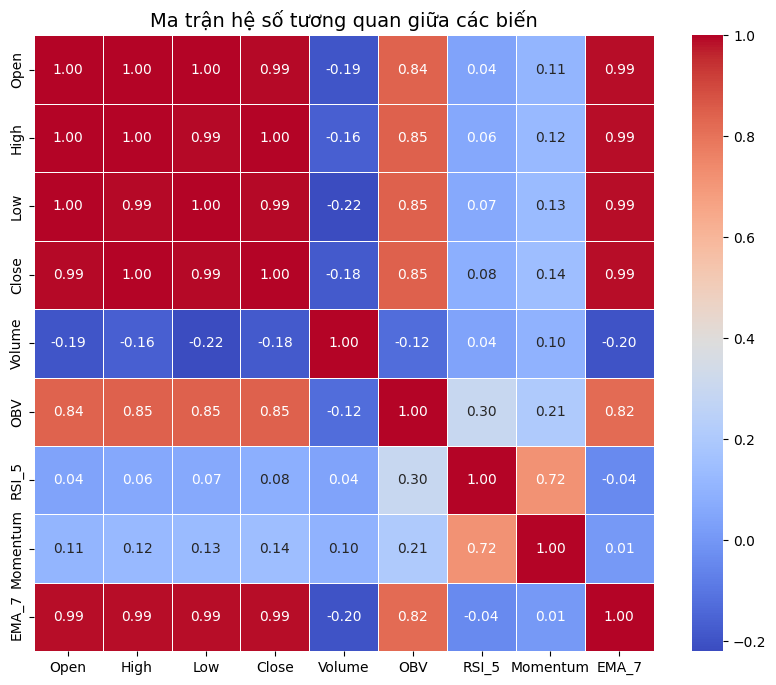

In [ ]:
import seaborn as sns


corr_matrix = df_daily.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Tiêu đề
plt.title("Ma trận hệ số tương quan giữa các biến", fontsize=14)
plt.show()

In [ ]:
df_daily = df_daily.drop(columns='EMA_7')
df_daily['Price_Change'] = df_daily['Close'].shift(-1)-df_daily['Close']
df_daily = df_daily.dropna()
df_daily

,Open,High,Low,Close,Volume,OBV,RSI_5,Momentum,Price_Change
Date/Time,,,,,,,,,
2018-10-24,98.0,99.5,97.5,98.8,681290,872710.0,12.761715,-0.2,-2.0
2018-10-25,96.7,98.2,94.6,96.8,404050,468660.0,1.451988,-2.3,-0.4
2018-10-26,96.2,98.0,95.7,96.4,653110,-184450.0,1.188638,-2.7,0.8
2018-10-29,95.5,97.7,95.0,97.2,643700,459250.0,32.015031,-1.9,-0.6
2018-10-30,95.5,97.3,95.5,96.6,452080,7170.0,24.770350,-2.4,0.6
...,...,...,...,...,...,...,...,...,...
2020-12-15,108.9,108.9,106.8,107.0,1205700,6389880.0,55.499573,2.0,0.0
2020-12-16,106.8,107.1,105.9,107.0,756200,6389880.0,55.499573,1.0,-2.3
2020-12-17,106.3,106.9,104.7,104.7,1352580,5037300.0,36.176356,-0.2,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max_scaler = MinMaxScaler(feature_range=(0, 1))
standard_scaler = StandardScaler()

columns_min_max = ['Open', 'High', 'Low', 'Close', 'Volume', 'OBV', 'RSI_5','Momentum']
df_daily[columns_min_max] = min_max_scaler.fit_transform(df_daily[columns_min_max])

df_daily.head()

,Open,High,Low,Close,Volume,OBV,RSI_5,Momentum,Price_Change
Date/Time,,,,,,,,,
2018-10-24,0.485348,0.475728,0.521201,0.500000,0.213666,0.449325,0.127689,0.510638,-2.0
2018-10-25,0.461538,0.450485,0.469965,0.463370,0.113407,0.434649,0.007786,0.446809,-0.4
2018-10-26,0.452381,0.446602,0.489399,0.456044,0.203475,0.410927,0.004994,0.434650,0.8
2018-10-29,0.439560,0.440777,0.477032,0.470696,0.200072,0.434307,0.331807,0.458967,-0.6
2018-10-30,0.439560,0.433010,0.485866,0.459707,0.130777,0.417887,0.255001,0.443769,0.6


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error

class LSTMStockPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, timesteps, dropout, 
                 epochs, batch_size, learning_rate):
        super(LSTMStockPredictor, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.timesteps = timesteps
        self.dropout = dropout
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        
        self.layer_norm = nn.LayerNorm(hidden_size)
        self.fc = nn.Linear(hidden_size, 1)
        self.criterion = nn.MSELoss()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.layer_norm(out[:, -1, :])
        out = self.fc(out)
        return out
    
    def prepare_data(self, df, features):
        X, y = [], []
        for i in range(len(df) - self.timesteps):
            X.append(df[features].iloc[i:i + self.timesteps].values)
            y.append(df['Price_Change'].iloc[i + self.timesteps])
        
        X = torch.tensor(X, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.float32).view(-1, 1)
        return X, y
    
    def fit(self, df, features, test_split=0.2):
        X, y = self.prepare_data(df, features)
        X, y = X.to(self.device), y.to(self.device)
        
        test_size = int(len(X) * test_split)
        train_size = len(X) - test_size
        
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]
        
        train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)
        
        self.optimizer = optim.Adam(self.parameters(), lr=self.learning_rate)
        self.to(self.device)
        
        for epoch in range(self.epochs):
            self.train()
            epoch_loss = 0
            for batch_X, batch_y in train_loader:
                batch_X, batch_y = batch_X.to(self.device), batch_y.to(self.device)
                
                outputs = self(batch_X)
                loss = self.criterion(outputs, batch_y)
                
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
                
                epoch_loss += loss.item()
            
            print(f"Epoch {epoch+1}/{self.epochs}, Train Loss: {epoch_loss/len(train_loader):.4f}")
        
        self.X_test, self.y_test = X_test, y_test
    
    def evaluate_test_mse(self):
        if not hasattr(self, 'X_test') or not hasattr(self, 'y_test'):
            raise ValueError("Tập test chưa được tạo! Hãy gọi fit() trước.")
        
        self.eval()
        with torch.no_grad():
            y_pred = self(self.X_test).cpu().numpy()
            y_true = self.y_test.cpu().numpy()
        
        mse = mean_squared_error(y_true, y_pred)
        return mse


In [ ]:
model = LSTMStockPredictor(
    input_size=8,       
    hidden_size=32,      
    num_layers=2,        
    timesteps=10,        
    dropout=0.4,         
    epochs=200,          
    batch_size=64,       
    learning_rate=0.0001
)
model.fit(df_daily,columns_min_max)
test_mse = model.evaluate_test_mse()
print("Test MSE:", test_mse)

Epoch 1/200, Train Loss: 2.7754
Epoch 2/200, Train Loss: 2.7899
Epoch 3/200, Train Loss: 2.7663
Epoch 4/200, Train Loss: 2.8546
Epoch 5/200, Train Loss: 2.7583
Epoch 6/200, Train Loss: 2.7266
Epoch 7/200, Train Loss: 2.8064
Epoch 8/200, Train Loss: 2.7906
Epoch 9/200, Train Loss: 2.8429
Epoch 10/200, Train Loss: 2.7743
Epoch 11/200, Train Loss: 2.9062
Epoch 12/200, Train Loss: 2.8587
Epoch 13/200, Train Loss: 2.7529
Epoch 14/200, Train Loss: 2.6967
Epoch 15/200, Train Loss: 2.8093
Epoch 16/200, Train Loss: 2.7456
Epoch 17/200, Train Loss: 2.7549
Epoch 18/200, Train Loss: 2.8603
Epoch 19/200, Train Loss: 2.7561
Epoch 20/200, Train Loss: 2.7880
Epoch 21/200, Train Loss: 2.6891
Epoch 22/200, Train Loss: 2.7578
Epoch 23/200, Train Loss: 2.8002
Epoch 24/200, Train Loss: 2.7959
Epoch 25/200, Train Loss: 2.7909
Epoch 26/200, Train Loss: 2.9026
Epoch 27/200, Train Loss: 2.7910
Epoch 28/200, Train Loss: 2.7695
Epoch 29/200, Train Loss: 2.8012
Epoch 30/200, Train Loss: 2.7947
Epoch 31/200, Train